In [ ]:
import pandas as pd
import numpy as np

#Έγινε μεσω του workbench αναζήτηση στο τουητερ για τον όρο "glyka_nera" 

Α. εχει γινει μια πρώτη επεξεργασία μέσω workbench αλλά συνεχίζουμε και στη python

In [ ]:
full_tweets_df =pd.read_csv('https://app.workbenchdata.com/workflows/147708/steps/step-kYcG5EYV0j03/current-result-table.csv')

In [ ]:
full_tweets_df.head()

created_at  ...                   id
0  2021-07-01  ...  1410566371382018048
1  2021-07-01  ...  1410565104781963264
2  2021-07-01  ...  1410563413953155073
3  2021-07-01  ...  1410559367116693512
4  2021-07-01  ...  1410559060596903937

[5 rows x 5 columns]

In [ ]:
full_tweets_df.shape

(1030, 5)

In [ ]:
short_tweets = full_tweets_df[['created_at','text' ]]

In [ ]:
short_tweets = short_tweets.rename(columns={'created_at': 'date', 'text': 'text'} )

In [ ]:
short_tweets.head()

date                                               text
0  2021-07-01  Γλυκά Νερά: Ποιος είναι ο άνδρας που στέκεται ...
1  2021-07-01  Σοκαρισμένος ο άνθρωπος που θα βάφτιζε τη μικρ...
2  2021-07-01  Γλυκά Νερά: Η “άγνωστη” αδελφή της Καρολάιν,\n...
3  2021-07-01  Γλυκά Νερά: Η άγνωστη αδερφή της Καρολάιν - Οι...
4  2021-07-01  Γλυκά Νερά: Μετανιωμένος δηλώνει ο δολοφόνος τ...

In [ ]:
short_tweets.tail()

date                                               text
1025  2021-06-28  Γλυκά Νερά: Στην οικογένεια της Καρολάιν προσω...
1026  2021-06-28  RT @libre_gr: Γλυκά Νερά: Στην οικογένεια της ...
1027  2021-06-28  Γλυκά Νερά: Ανατροπή με το ταξίδι στη Σούδα - ...
1028  2021-06-28  RT @documentonews: Η απόφαση για το μέλλον της...
1029  2021-06-28  RT @documentonews: Η απόφαση για το μέλλον της...

In [ ]:
short_tweets.dtypes

date    object
text    object
dtype: object

In [ ]:
short_tweets['year'] = pd.DatetimeIndex(short_tweets['date']).year
short_tweets['month'] = pd.DatetimeIndex(short_tweets['date']).month
short_tweets['day'] = pd.DatetimeIndex(short_tweets['date']).day

In [ ]:
short_tweets.head()

date                                               text  ...  month  day
0  2021-07-01  Γλυκά Νερά: Ποιος είναι ο άνδρας που στέκεται ...  ...      7    1
1  2021-07-01  Σοκαρισμένος ο άνθρωπος που θα βάφτιζε τη μικρ...  ...      7    1
2  2021-07-01  Γλυκά Νερά: Η “άγνωστη” αδελφή της Καρολάιν,\n...  ...      7    1
3  2021-07-01  Γλυκά Νερά: Η άγνωστη αδερφή της Καρολάιν - Οι...  ...      7    1
4  2021-07-01  Γλυκά Νερά: Μετανιωμένος δηλώνει ο δολοφόνος τ...  ...      7    1

[5 rows x 5 columns]

In [ ]:
short_tweets['text'] = short_tweets['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ")

#προχωραμε για το wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
short_tweets[short_tweets['year']==2021]['text']

0       Γλυκά Νερά: Ποιος είναι ο άνδρας που στέκεται ...
1       Σοκαρισμένος ο άνθρωπος που θα βάφτιζε τη μικρ...
2       Γλυκά Νερά: Η “άγνωστη” αδελφή της Καρολάιν,\n...
3       Γλυκά Νερά: Η άγνωστη αδερφή της Καρολάιν - Οι...
4       Γλυκά Νερά: Μετανιωμένος δηλώνει ο δολοφόνος τ...
                              ...                        
1025    Γλυκά Νερά: Στην οικογένεια της Καρολάιν προσω...
1026    RT @libre_gr: Γλυκά Νερά: Στην οικογένεια της ...
1027    Γλυκά Νερά: Ανατροπή με το ταξίδι στη Σούδα - ...
1028    RT @documentonews: Η απόφαση για το μέλλον της...
1029    RT @documentonews: Η απόφαση για το μέλλον της...
Name: text, Length: 1030, dtype: object

In [ ]:
text = short_tweets['text'].str.replace('ά','α').str.replace("έ", "ε").str.replace('ή','η').str.replace('ί','ι').str.replace('ό','ο').str.replace('ύ','υ').str.replace('ώ','ω')

In [ ]:
text = short_tweets[short_tweets['year']==2021]['text'].str.cat(sep = ' ').replace("amp", ' ')

In [ ]:
!python -m spacy download el_core_news_sm

✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_sm')


In [ ]:
import spacy

In [ ]:
nlp = spacy.load('el_core_news_sm')

In [ ]:
list(nlp.Defaults.stop_words)[0:20]

['υπ',
 'οσηδήποτε',
 'οσουδήποτε',
 'τούτα',
 'όλα',
 'ίσια',
 'εκείνων',
 'έως',
 'εκείνους',
 'έχω',
 'ποιές',
 'αυτό',
 'πλην',
 'εκείνου',
 'τοι',
 'ως',
 'όποιος',
 'πολλοί',
 'σας',
 'είμαι']

In [ ]:
# Stop words
# Link to greek stop words: https://www.translatum.gr/forum/index.php?topic=3550.0?topic=3550.0
STOP_WORDS = set(
    """
αδιάκοπα αι ακόμα ακόμη ακριβώς άλλα αλλά αλλαχού άλλες άλλη άλλην
άλλης αλλιώς αλλιώτικα άλλο άλλοι αλλοιώς αλλοιώτικα άλλον άλλος άλλοτε αλλού
άλλους άλλων άμα άμεσα αμέσως αν ανά ανάμεσα αναμεταξύ άνευ αντί αντίπερα αντίς
άνω ανωτέρω άξαφνα απ απέναντι από απόψε άρα άραγε αρκετά αρκετές
αρχικά ας αύριο αυτά αυτές αυτή αυτήν αυτής αυτό αυτοί αυτόν αυτός αυτού αυτούς
αυτών αφότου αφού
βέβαια βεβαιότατα
γι για γιατί γρήγορα γύρω
δα δε δείνα δεν δεξιά δήθεν δηλαδή δι δια διαρκώς δικά δικό δικοί δικός δικού
δικούς διόλου δίπλα δίχως
εάν εαυτό εαυτόν εαυτού εαυτούς εαυτών έγκαιρα εγκαίρως εγώ εδώ ειδεμή είθε είμαι
είμαστε είναι εις είσαι είσαστε είστε είτε είχα είχαμε είχαν είχατε είχε είχες έκαστα
έκαστες έκαστη έκαστην έκαστης έκαστο έκαστοι έκαστον έκαστος εκάστου εκάστους εκάστων
εκεί εκείνα εκείνες εκείνη εκείνην εκείνης εκείνο εκείνοι εκείνον εκείνος εκείνου
εκείνους εκείνων εκτός εμάς εμείς εμένα εμπρός εν ένα έναν ένας ενός εντελώς εντός
εναντίον  εξής  εξαιτίας  επιπλέον επόμενη εντωμεταξύ ενώ εξ έξαφνα εξήσ εξίσου έξω επάνω
επειδή έπειτα επί επίσης επομένως εσάς εσείς εσένα έστω εσύ ετέρα ετέραι ετέρας έτερες
έτερη έτερης έτερο έτεροι έτερον έτερος ετέρου έτερους ετέρων ετούτα ετούτες ετούτη ετούτην
ετούτης ετούτο ετούτοι ετούτον ετούτος ετούτου ετούτους ετούτων έτσι εύγε ευθύς ευτυχώς εφεξής
έχει έχεις έχετε έχομε έχουμε έχουν εχτές έχω έως έγιναν  έγινε  έκανε  έξι  έχοντας
η ήδη ήμασταν ήμαστε ήμουν ήσασταν ήσαστε ήσουν ήταν ήτανε ήτοι ήττον
θα
ι ιδία ίδια ίδιαν ιδίας ίδιες ίδιο ίδιοι ίδιον ίδιοσ ίδιος ιδίου ίδιους ίδιων ιδίως ιι ιιι
ίσαμε ίσια ίσως
κάθε καθεμία καθεμίας καθένα καθένας καθενός καθετί καθόλου καθώς και κακά κακώς καλά
καλώς καμία καμίαν καμίας κάμποσα κάμποσες κάμποση κάμποσην κάμποσης κάμποσο κάμποσοι
κάμποσον κάμποσος κάμποσου κάμποσους κάμποσων κανείς κάνεν κανένα κανέναν κανένας
κανενός κάποια κάποιαν κάποιας κάποιες κάποιο κάποιοι κάποιον κάποιος κάποιου κάποιους
κάποιων κάποτε κάπου κάπως κατ κατά κάτι κατιτί κατόπιν κάτω κιόλας κλπ κοντά κτλ κυρίως
λιγάκι λίγο λιγότερο λόγω λοιπά λοιπόν
μα μαζί μακάρι μακρυά μάλιστα μάλλον μας με μεθαύριο μείον μέλει μέλλεται μεμιάς μεν
μερικά μερικές μερικοί μερικούς μερικών μέσα μετ μετά μεταξύ μέχρι μη μήδε μην μήπως
μήτε μια μιαν μιας μόλις μολονότι μονάχα μόνες μόνη μόνην μόνης μόνο μόνοι μονομιάς
μόνος μόνου μόνους μόνων μου μπορεί μπορούν μπρος μέσω  μία  μεσώ
να ναι νωρίς
ξανά ξαφνικά
ο οι όλα όλες όλη όλην όλης όλο ολόγυρα όλοι όλον ολονέν όλος ολότελα όλου όλους όλων
όλως ολωσδιόλου όμως όποια οποιαδήποτε οποίαν οποιανδήποτε οποίας οποίος οποιασδήποτε οποιδήποτε
όποιες οποιεσδήποτε όποιο οποιοδηήποτε όποιοι όποιον οποιονδήποτε όποιος οποιοσδήποτε
οποίου οποιουδήποτε οποίους οποιουσδήποτε οποίων οποιωνδήποτε όποτε οποτεδήποτε όπου
οπουδήποτε όπως ορισμένα ορισμένες ορισμένων ορισμένως όσα οσαδήποτε όσες οσεσδήποτε
όση οσηδήποτε όσην οσηνδήποτε όσης οσησδήποτε όσο οσοδήποτε όσοι οσοιδήποτε όσον οσονδήποτε
όσος οσοσδήποτε όσου οσουδήποτε όσους οσουσδήποτε όσων οσωνδήποτε όταν ότι οτιδήποτε
ότου ου ουδέ ούτε όχι οποία  οποίες  οποίο  οποίοι  οπότε  ος
πάνω  παρά  περί  πολλά  πολλές  πολλοί  πολλούς  που  πρώτα  πρώτες  πρώτη  πρώτο  πρώτος  πως
πάλι πάντα πάντοτε παντού πάντως πάρα πέρα πέρι περίπου περισσότερο πέρσι πέρυσι πια πιθανόν
πιο πίσω πλάι πλέον πλην ποιά ποιάν ποιάς ποιές ποιό ποιοί ποιόν ποιός ποιού ποιούς
ποιών πολύ πόσες πόση πόσην πόσης πόσοι πόσος πόσους πότε ποτέ πού πούθε πουθενά πρέπει
πριν προ προκειμένου πρόκειται πρόπερσι προς προτού προχθές προχτές πρωτύτερα πώς
σαν σας σε σεις σου στα στη στην στης στις στο στον στου στους στων συγχρόνως
συν συνάμα συνεπώς συχνάς συχνές συχνή συχνήν συχνής συχνό συχνοί συχνόν
συχνός συχνού συχνούς συχνών συχνώς σχεδόν
τα τάδε ταύτα ταύτες ταύτη ταύτην ταύτης ταύτοταύτον ταύτος ταύτου ταύτων τάχα τάχατε
τελευταία  τελευταίο  τελευταίος  τού  τρία  τρίτη  τρεις τελικά τελικώς τες τέτοια τέτοιαν
τέτοιας τέτοιες τέτοιο τέτοιοι τέτοιον τέτοιος τέτοιου
τέτοιους τέτοιων τη την της τι τίποτα τίποτε τις το τοι τον τοσ τόσα τόσες τόση τόσην
τόσης τόσο τόσοι τόσον τόσος τόσου τόσους τόσων τότε του τουλάχιστο τουλάχιστον τους τούς τούτα
τούτες τούτη τούτην τούτης τούτο τούτοι τούτοις τούτον τούτος τούτου τούτους τούτων τυχόν
των τώρα
υπ υπέρ υπό υπόψη υπόψιν ύστερα
χωρίς χωριστά
ω ως ωσάν ωσότου ώσπου ώστε ωστόσο ωχ
""".split()
)

#WORDCLOUD

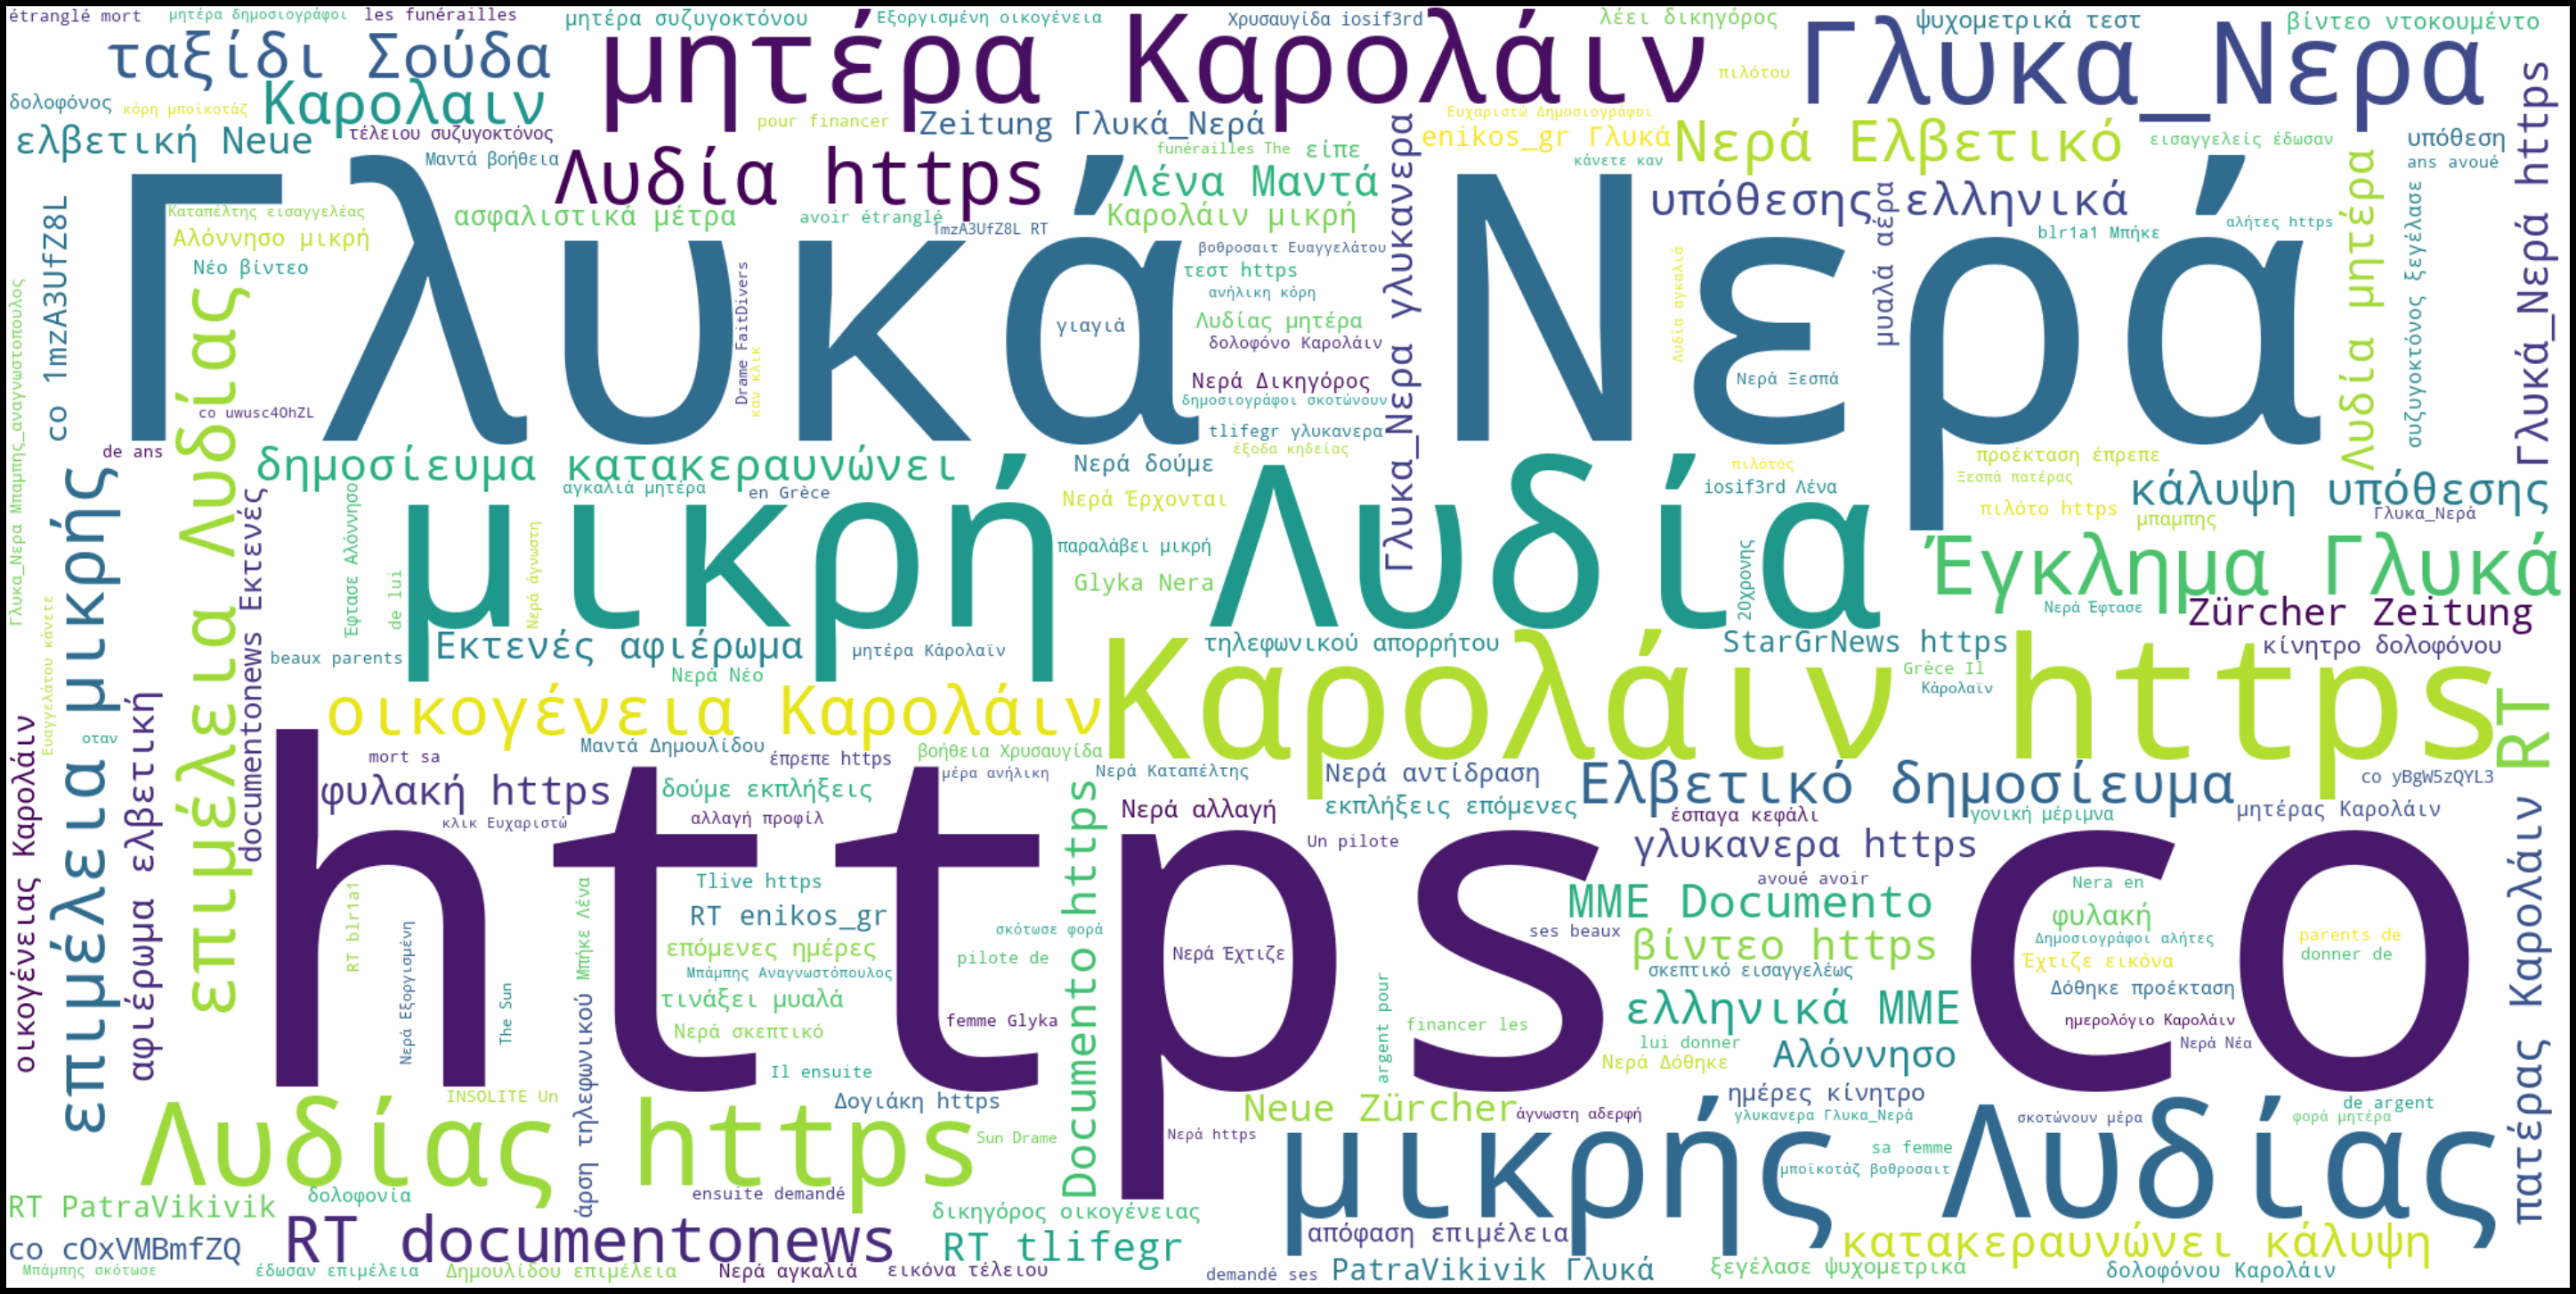

In [ ]:

wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'white'
 ).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
#λίγη ακόμα μορφοποιηση

In [ ]:
list(STOPWORDS)[0:20]

['up',
 'because',
 "you're",
 "when's",
 "there's",
 "we'd",
 'same',
 'we',
 "you'd",
 'if',
 "we'll",
 'them',
 'my',
 "they've",
 "that's",
 'just',
 'yourself',
 'myself',
 'again',
 'would']

In [ ]:

doc = nlp(short_tweets['text'][1])

In [ ]:
for token in doc:
    print(token, token.lemma_)

Σοκαρισμένος σοκαρισμένο
ο ο
άνθρωπος άνθρωπος
που που
θα θα
βάφτιζε βάφτιζε
τη τη
μικρή μικρός
Λυδία Λυδία
– –
Ο ο
33χρονος 33χρονος
τον τον
έμαθε έμαθε
να να
πιλοτάρει πιλοτάρω


 


https://t.co/o8hUmPless https://t.co/o8humpless


In [ ]:

' '.join(token.lemma_ for token in doc)

'σοκαρισμένο ο άνθρωπος που θα βάφτιζε τη μικρός Λυδία – ο 33χρονος τον έμαθε να πιλοτάρω \n\n https://t.co/o8humpless'

In [ ]:
text

'Γλυκά Νερά: Ποιος είναι ο άνδρας που στέκεται στο πλευρό της μητέρας της Καρολάιν (βίντεο) - https://t.co/uO9F2omdfN https://t.co/Ib8jzAvFbr Σοκαρισμένος ο άνθρωπος που θα βάφτιζε τη μικρή Λυδία – Ο 33χρονος τον έμαθε να πιλοτάρει\n\nhttps://t.co/o8hUmPless Γλυκά Νερά: Η “άγνωστη” αδελφή της Καρολάιν,\nhttps://t.co/7sDAiAiNhK, Γλυκά Νερά: Η άγνωστη αδερφή της Καρολάιν - Οι αναρτήσεις της μετά τη δολοφονία (vid) - https://t.co/GHZ2Gtp8wk https://t.co/Cfbff9s4ck Γλυκά Νερά: Μετανιωμένος δηλώνει ο δολοφόνος της Καρολάιν -  Τι αποκάλυψε ο δικηγόρος του (βίντεο) - https://t.co/T3KAPO3nKQ https://t.co/jOJEQUfhka Γλυκά Νερά: Η "άγνωστη" αδελφή της Καρολάιν,\nhttps://t.co/1R0C9iIsj3, Γλυκά Νερά: Η «άγνωστη» αδερφή της Καρολάιν – Τι έγραψε για τη δολοφονία της 20χρονης https://t.co/QWKKLVSUfl Γλυκά Νερά: Σοκαρισμένος ο άνθρωπος που θα βάφτιζε τη μικρή Λυδία https://t.co/DN0VII6Tga Γλυκά Νερά: Η «άγνωστη» αδερφή της Καρολάιν – Οι αναρτήσεις μετά τη δολοφονία της 20χρονης - https://t.co/Cz0V1nJk

In [ ]:
full_doc = nlp(text)

In [ ]:
clear_text = ' '.join(token.lemma_ for token in full_doc)

In [ ]:
clear_text[200:400]

' 33χρονος τον έμαθε να πιλοτάρω \n\n https://t.co/o8humpless γλυκά νερά : η " άγνωστη " αδελφή της Καρολάιν , \n https://t.co/7sdaiainhk , γλυκά νερά : η άγνωστη αδερφή της Καρολάιν - οι αναρτήσει της με'

#Τελική εικόνα

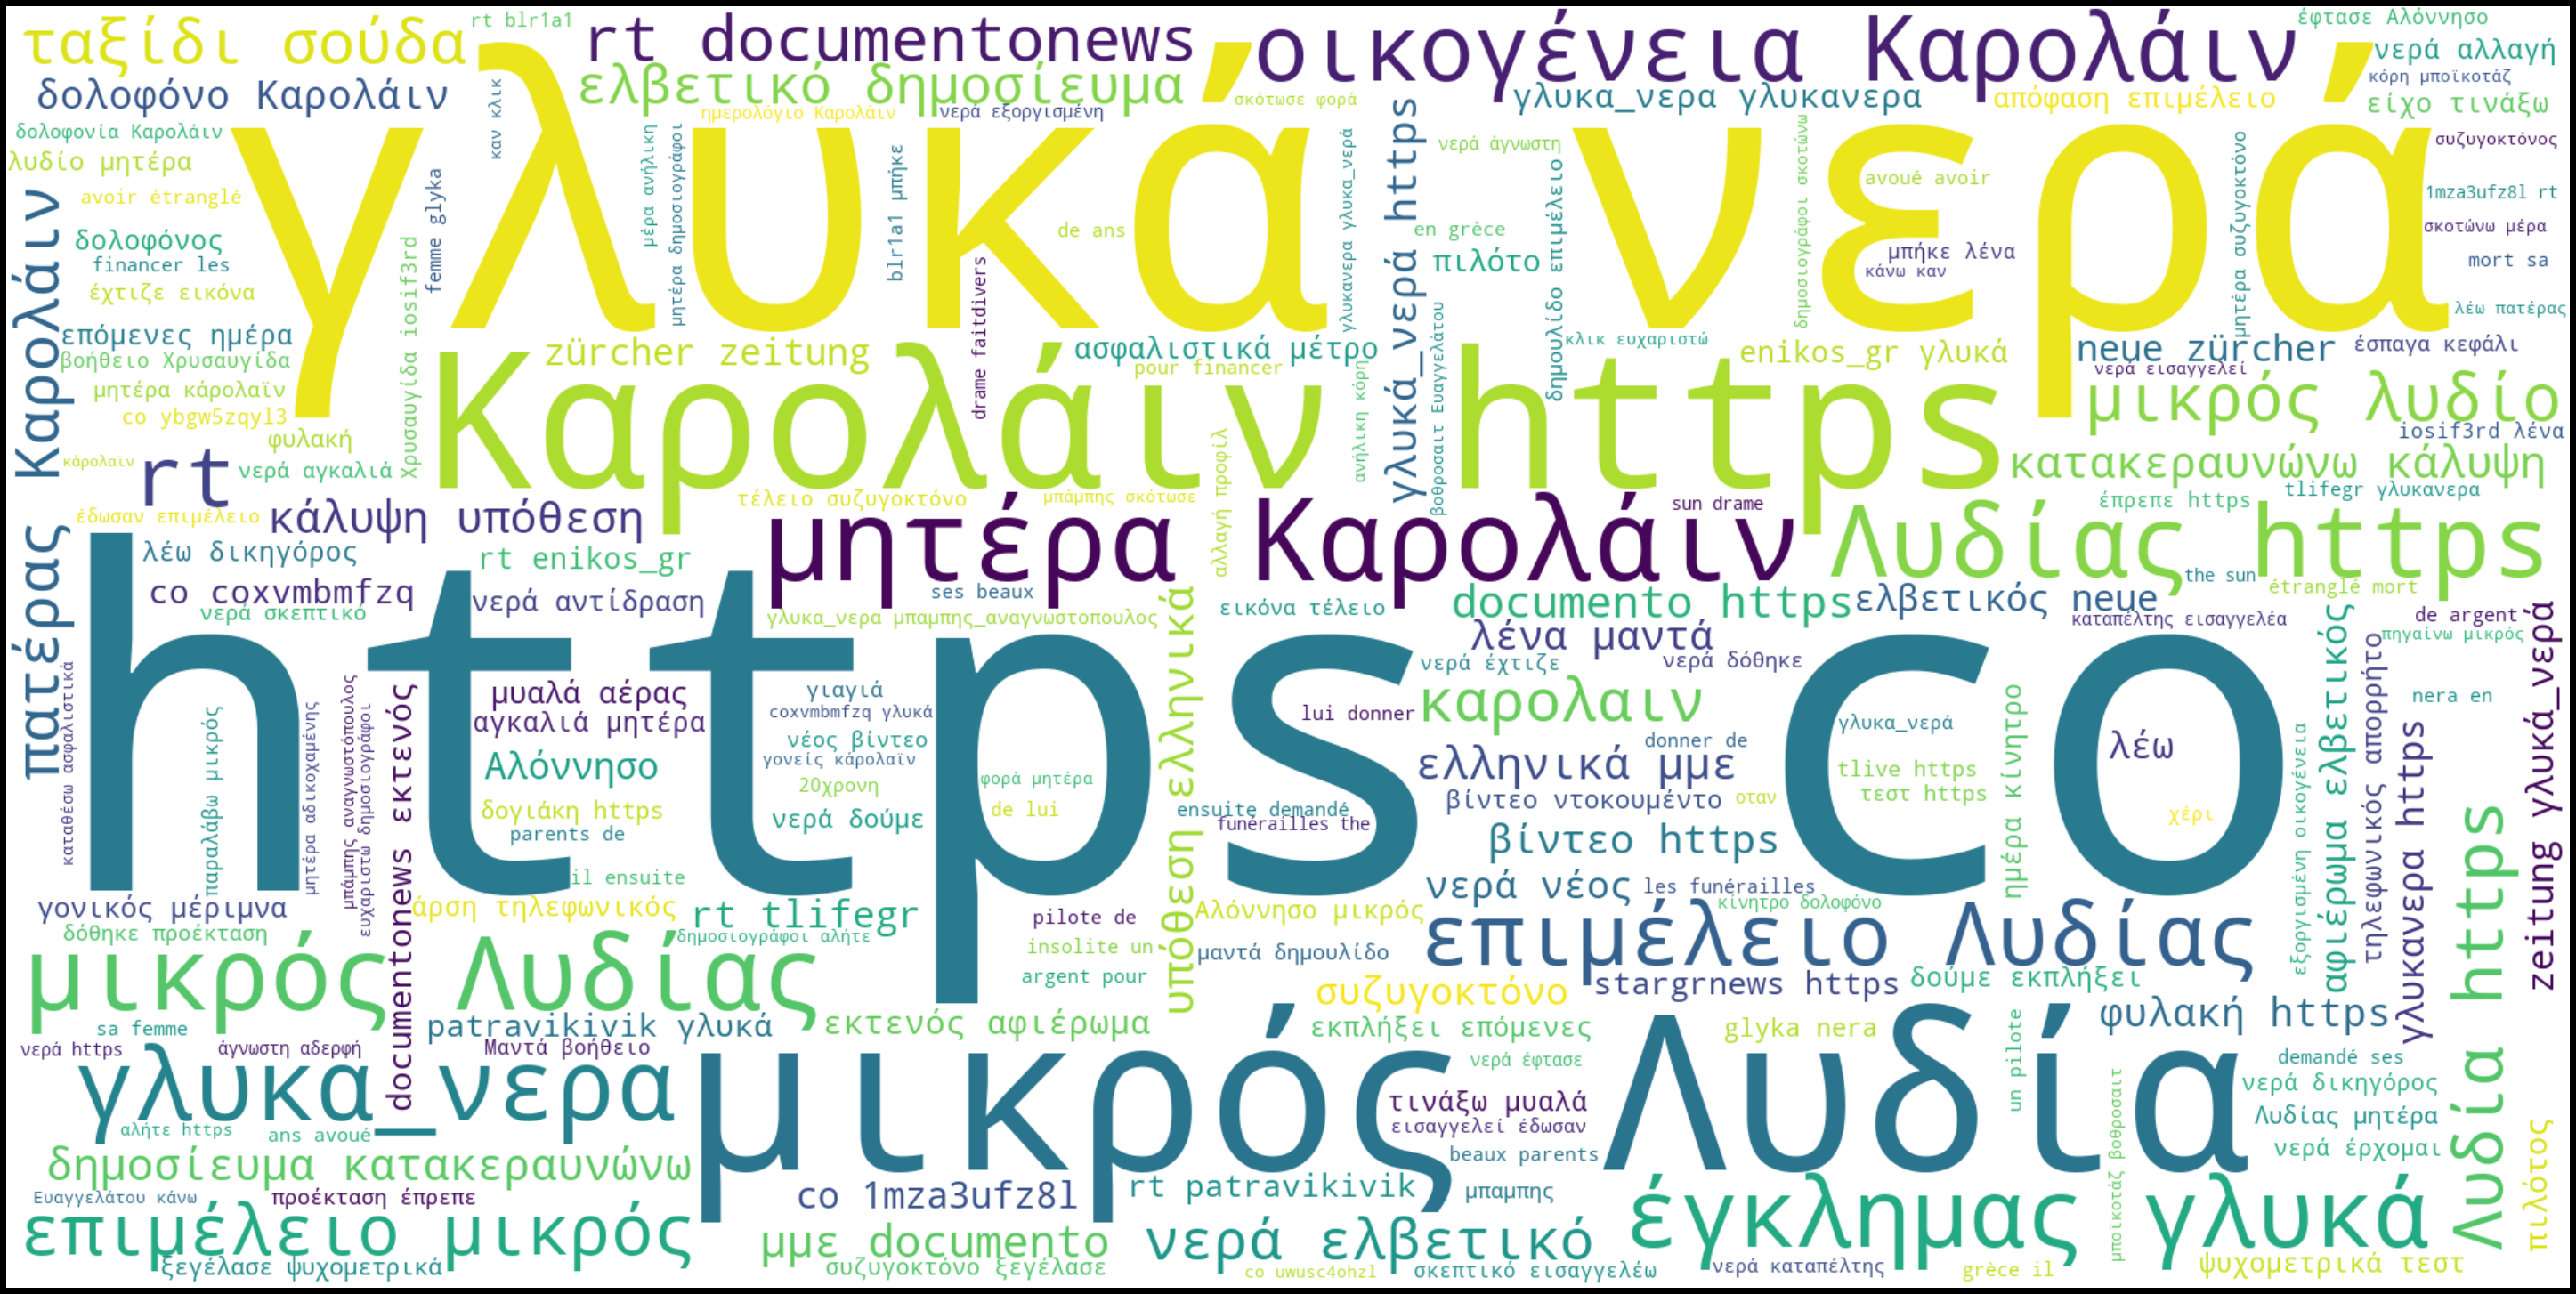

In [ ]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'white'
 ).generate(clear_text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
#Συχνες λεξεις

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
count_vector = cv.fit_transform(short_tweets['text'])

In [ ]:

count_vector.shape

(1030, 3173)

#counter Vectorizer

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

00  000  026  02r5vo9z75  06wkumhryc  ...  όυτε  όχι  ώρα  ώρες  ώστε
0   0    0    0           0           0  ...     0    0    0     0     0
1   0    0    0           0           0  ...     0    0    0     0     0
2   0    0    0           0           0  ...     0    0    0     0     0
3   0    0    0           0           0  ...     0    0    0     0     0
4   0    0    0           0           0  ...     0    0    0     0     0

[5 rows x 3173 columns]

In [ ]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95)

In [ ]:
count_vector = cv.fit_transform(short_tweets['text'])

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

1mza3ufz8l  20χρονης  33  33χρονος  ...  φυλακή  χέρια  χρυσαυγίδα  ψυχομετρικά
0           0         0   0         0  ...       0      0           0            0
1           0         0   0         1  ...       0      0           0            0
2           0         0   0         0  ...       0      0           0            0
3           0         0   0         0  ...       0      0           0            0
4           0         0   0         0  ...       0      0           0            0

[5 rows x 198 columns]

In [ ]:
#######

In [ ]:
from html import unescape
def my_tokenizer(doc):
            
    # apply the preprocessing and tokenzation steps
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    # use CountVectorizer's _word_ngrams built in method
    # to remove stop words and extract n-grams
    return(lemmatized_tokens)

In [ ]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(short_tweets['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έγκαιρος', 'έκασ', 'έξαφνος', 'έτερου', 'ίσιος', 'αδιάκοπο', 'αλλιώτικας', 'αλλοιώτικας', 'αφότο', 'βεβαιότατο', 'γρήγορο', 'δίχω', 'εαυτή', 'εκάστα', 'εκάστο', 'ετέρο', 'ετού', 'ετούτε', 'ευθύ', 'εχτά', 'ιδίο', 'κάνω', 'καθενό', 'κανενό', 'μέλλομαι', 'μεμιά', 'μερικού', 'μερικός', 'μπορώ', 'μόνε', 'ολωσδιόλο', 'ολόγυρας', 'ορισμένο', 'ορισμένος', 'ορισμένω', 'ποί', 'ποία', 'ποιής', 'ποιώ', 'πολλός', 'προχθά', 'προχτέ', 'πόσε', 'πόσο', 'σει', 'στος', 'συχνά', 'ταύτο', 'τόσε', 'όποι'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


...  20χρονη  33χρονος  @blr1a1  ...  φυλακός  χέρι  χρυσαυγίδας  ψυχομετρικά
0    0        0         0        0  ...        0     0            0            0
1    0        0         0        0  ...        0     0            0            0
2    0        0         0        0  ...        0     0            0            0
3    0        0         0        0  ...        0     0            0            0
4    0        0         0        0  ...        0     0            0            0

[5 rows x 187 columns]

In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20) #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(short_tweets['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

co  https  rt  έγκλημα  αλόννησο  ...  μικρή  μικρής  νερά  ταξίδι  φυλακή
0   2      2   0        0         0  ...      0       0     1       0       0
1   1      1   0        0         0  ...      1       0     0       0       0
2   1      1   0        0         0  ...      0       0     1       0       0
3   2      2   0        0         0  ...      0       0     1       0       0
4   2      2   0        0         0  ...      0       0     1       0       0

[5 rows x 20 columns]

In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, token_pattern = '\\bκυ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(short_tweets['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

κυκλοφορουν  κυνηγάει  κυνηγουν  κυνηγουσαν  κυνικότητα  κυνικότητας  κυρία
0            0         0         0           0           0            0      0
1            0         0         0           0           0            0      0
2            0         0         0           0           0            0      0
3            0         0         0           0           0            0      0
4            0         0         0           0           0            0      0

In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(2, 2) ) #token_pattern = '\\bκυ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(short_tweets['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

documento https  https co  ...  οικογένεια καρολάιν  ταξίδι σούδα
0                0         2  ...                    0             0
1                0         1  ...                    0             0
2                0         1  ...                    0             0
3                0         2  ...                    0             0
4                0         2  ...                    0             0

[5 rows x 20 columns]

#Most common Words

In [ ]:
results.sum(axis =0).sort_values(ascending = False)

https co                     1194
γλυκά νερά                    697
μικρή λυδία                   150
καρολάιν https                 92
μικρής λυδίας                  80
μητέρα καρολάιν                75
λυδίας https                   68
έγκλημα γλυκά                  61
επιμέλεια λυδίας               53
λυδία https                    51
επιμέλεια μικρής               45
οικογένεια καρολάιν            43
rt documentonews               38
ταξίδι σούδα                   37
δημοσίευμα κατακεραυνώνει      31
ελβετικό δημοσίευμα            31
ελληνικά μμε                   31
κάλυψη υπόθεσης                31
νερά ελβετικό                  31
documento https                31
dtype: int64

In [ ]:

sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()

https co          1194
γλυκά νερά         697
μικρή λυδία        150
καρολάιν https      92
μικρής λυδίας       80
dtype: int64

In [ ]:
results.sum(axis =0).sort_values(ascending = False)

https co                     1194
γλυκά νερά                    697
μικρή λυδία                   150
καρολάιν https                 92
μικρής λυδίας                  80
μητέρα καρολάιν                75
λυδίας https                   68
έγκλημα γλυκά                  61
επιμέλεια λυδίας               53
λυδία https                    51
επιμέλεια μικρής               45
οικογένεια καρολάιν            43
rt documentonews               38
ταξίδι σούδα                   37
δημοσίευμα κατακεραυνώνει      31
ελβετικό δημοσίευμα            31
ελληνικά μμε                   31
κάλυψη υπόθεσης                31
νερά ελβετικό                  31
documento https                31
dtype: int64

In [ ]:

cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, #ngram_range=(1, 2), 
                     vocabulary = ['γλυκά νερά', 'μικρή λυδία']) #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(short_tweets['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

γλυκά νερά  μικρή λυδία
0           0            0
1           0            0
2           0            0
3           0            0
4           0            0

#γραφιμα


In [ ]:
sum_words.sort_values(ascending = False).head(17)

https co                     1194
γλυκά νερά                    697
μικρή λυδία                   150
καρολάιν https                 92
μικρής λυδίας                  80
μητέρα καρολάιν                75
λυδίας https                   68
έγκλημα γλυκά                  61
επιμέλεια λυδίας               53
λυδία https                    51
επιμέλεια μικρής               45
οικογένεια καρολάιν            43
rt documentonews               38
ταξίδι σούδα                   37
δημοσίευμα κατακεραυνώνει      31
ελβετικό δημοσίευμα            31
ελληνικά μμε                   31
dtype: int64

In [ ]:
most_common=sum_words.sort_values(ascending = False).head(16)

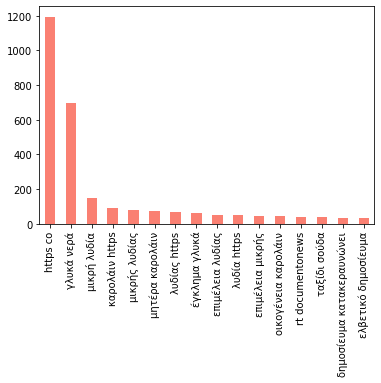

In [ ]:
most_common.plot(kind='bar',color='salmon')

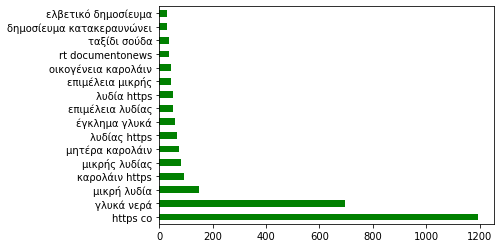

In [ ]:
most_common.plot(kind='barh',color='green')

In [ ]:
##################################

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words= nlp.Defaults.stop_words, max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(short_tweets['text'])

In [ ]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names()) 
results.head()

0wwbdznfnk   11  14χρονη  ...  ψυχολόγος  ψυχολόγων  ψυχομετρικά
0         0.0  0.0      0.0  ...        0.0        0.0          0.0
1         0.0  0.0      0.0  ...        0.0        0.0          0.0
2         0.0  0.0      0.0  ...        0.0        0.0          0.0
3         0.0  0.0      0.0  ...        0.0        0.0          0.0
4         0.0  0.0      0.0  ...        0.0        0.0          0.0

[5 rows x 500 columns]

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))

cosine scores ==>  [[1.         0.03024053 0.17271999 ... 0.05189878 0.02798352 0.02798352]]


In [ ]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)) 

cosine scores ==>  [[1.         0.03024053 0.17271999 ... 0.05189878 0.02798352 0.02798352]
 [0.03024053 1.         0.02792234 ... 0.0128539  0.01347275 0.01347275]
 [0.17271999 0.02792234 1.         ... 0.07118912 0.02583835 0.02583835]
 ...
 [0.05189878 0.0128539  0.07118912 ... 1.         0.01189455 0.01189455]
 [0.02798352 0.01347275 0.02583835 ... 0.01189455 1.         1.        ]
 [0.02798352 0.01347275 0.02583835 ... 0.01189455 1.         1.        ]]


In [ ]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

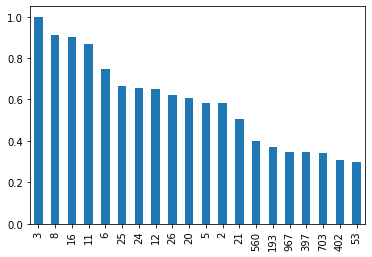

In [ ]:
pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(20).plot(kind = 'bar')

In [ ]:
short_tweets['text'].loc[3]

'Γλυκά Νερά: Η άγνωστη αδερφή της Καρολάιν - Οι αναρτήσεις της μετά τη δολοφονία (vid) - https://t.co/GHZ2Gtp8wk https://t.co/Cfbff9s4ck'